In [1]:
from fastai.vision.all import *
from fastbook import *

path = Path('/home/ilua/fastbook_week8_book13/archive/car parts')

In [2]:
trn_path = path/'train'
val_path = path/'valid'

In [3]:
dls = ImageDataLoaders.from_folder(
    trn_path, 
    valid_pct=0.2,   
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=[*aug_transforms(), Normalize()],
    bs=128
)

In [11]:
def block(ni, nf): return ConvLayer(ni, nf, stride=2)
def get_model():
    return nn.Sequential(
        block(3, 32),
        block(32, 64),
        block(64, 64),
        block(64, 128),
        block(128, 256),
        nn.AdaptiveAvgPool2d(1),
        Flatten(),
        nn.Linear(256, dls.c))

In [12]:
def get_learner(m):
    return Learner(dls, m, loss_func=nn.CrossEntropyLoss(), metrics=accuracy
                  ).to_fp16()

learn = get_learner(get_model())

SuggestedLRs(valley=0.0006918309954926372)

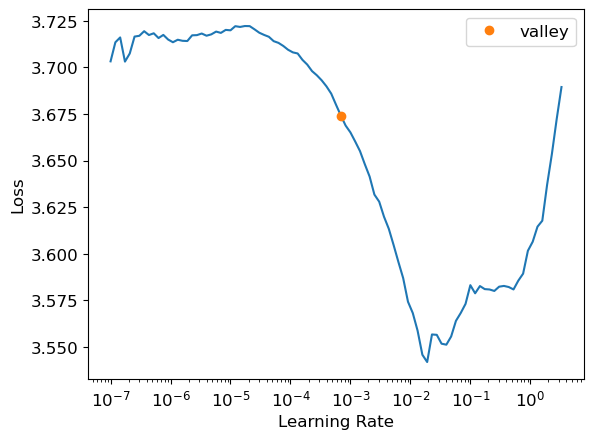

In [8]:
learn.lr_find()

In [14]:
learn.fit_one_cycle(30,0.002)

epoch,train_loss,valid_loss,accuracy,time
0,1.959620,2.025751,0.448301,00:03
1,1.963742,2.014944,0.445409,00:03
2,1.974227,2.075911,0.417209,00:03
3,1.987211,2.131300,0.402748,00:03
4,1.979121,2.615852,0.303688,00:03
5,2.003298,2.050152,0.427332,00:03
6,1.961864,2.481848,0.352856,00:03
7,1.917841,2.108296,0.404194,00:03
8,1.856379,1.978391,0.424440,00:03
9,1.801674,1.833139,0.480116,00:03


In [37]:
dls = ImageDataLoaders.from_folder(
    trn_path, 
    valid_pct=0.2,   
    item_tfms=RandomResizedCrop(224, min_scale=0.75),
    batch_tfms=[*aug_transforms(), Normalize()],
    bs=128
)

def block(ni, nf): return ConvLayer(ni, nf, stride=2)
def get_model():
    return nn.Sequential(
        block(3, 32),
        block(32, 64),
        block(64, 64),
        block(64, 128),
        nn.Dropout(0.15),
        block(128, 256),
        block(256, 256),
        nn.AdaptiveAvgPool2d(1),
        Flatten(),
        nn.Linear(256, 128),
        nn.Dropout(0.15),
        nn.Linear(128, dls.c))

def get_learner(m):
    return Learner(dls, m, loss_func=CrossEntropyLossFlat(), metrics=accuracy
                  ).to_fp16()

learn = get_learner(get_model())

In [39]:
learn.fit_one_cycle(20,0.002)

epoch,train_loss,valid_loss,accuracy,time
0,1.527833,1.580990,0.558207,00:03
1,1.598604,1.788709,0.488792,00:03
2,1.697042,2.174400,0.409978,00:03
3,1.770623,1.885389,0.465654,00:03
4,1.775299,2.122756,0.435286,00:03
5,1.734829,1.884752,0.446855,00:03
6,1.663414,1.697800,0.524946,00:03
7,1.578351,2.202212,0.428778,00:03
8,1.510943,1.469573,0.562545,00:03
9,1.448314,1.507281,0.571945,00:03


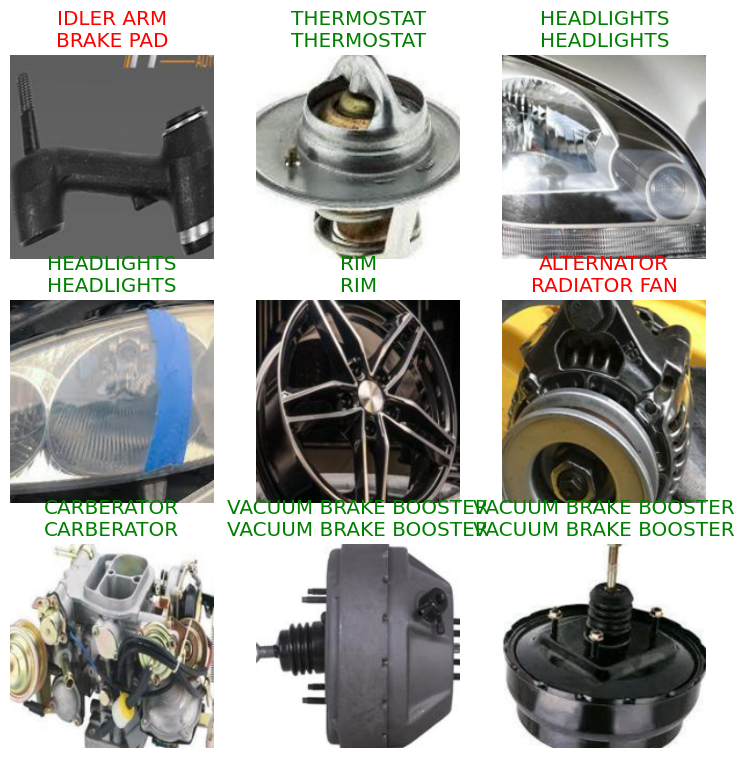

In [40]:
learn.show_results()

In [46]:
def _conv_block(ni,nf,stride):
    return nn.Sequential(
        ConvLayer(ni, nf, stride=stride),
        ConvLayer(nf, nf, act_cls=None, norm_type=NormType.BatchZero))

class ResBlock(Module):
    def __init__(self, ni, nf, stride=1):
        self.convs = _conv_block(ni,nf,stride)
        self.idconv = noop if ni==nf else ConvLayer(ni, nf, 1, act_cls=None)
        self.pool = noop if stride==1 else nn.AvgPool2d(2, ceil_mode=True)

    def forward(self, x):
        return F.relu(self.convs(x) + self.idconv(self.pool(x)))

In [47]:
def block(ni, nf):
    return nn.Sequential(ResBlock(ni, nf, stride=2), ResBlock(nf, nf))

In [48]:
dls = ImageDataLoaders.from_folder(
    trn_path, 
    valid_pct=0.2,   
    item_tfms=RandomResizedCrop(224, min_scale=0.75),
    batch_tfms=[*aug_transforms(), Normalize()],
    bs=128
)

def block(ni, nf): return ConvLayer(ni, nf, stride=2)
def get_model():
    return nn.Sequential(
        block(3, 32),
        block(32, 64),
        block(64, 64),
        block(64, 128),
        nn.Dropout(0.15),
        block(128, 256),
        block(256, 256),
        nn.AdaptiveAvgPool2d(1),
        Flatten(),
        nn.Linear(256, 128),
        nn.Dropout(0.15),
        nn.Linear(128, dls.c))

def get_learner(m):
    return Learner(dls, m, loss_func=CrossEntropyLossFlat(), metrics=accuracy
                  ).to_fp16()

learn = get_learner(get_model())

In [50]:
learn.fit_one_cycle(20,0.005)

epoch,train_loss,valid_loss,accuracy,time
0,1.184283,1.306724,0.619667,00:03
1,1.264680,1.588215,0.535069,00:03
2,1.395098,1.879082,0.464208,00:03
3,1.534047,2.122035,0.426609,00:03
4,1.601665,2.358531,0.425886,00:03
5,1.562849,1.997898,0.456978,00:03
6,1.480958,2.006254,0.453362,00:03
7,1.417188,1.572301,0.537238,00:03
8,1.325339,1.795122,0.525669,00:03
9,1.257642,1.517083,0.580622,00:03


In [51]:
learn.fit_one_cycle(30,0.008)

epoch,train_loss,valid_loss,accuracy,time
0,0.603249,0.886468,0.743312,00:03
1,0.638305,0.998687,0.719450,00:03
2,0.720606,1.085334,0.686913,00:03
3,0.879587,1.970566,0.527115,00:03
4,1.036831,2.060217,0.505423,00:03
5,1.114911,1.847986,0.523500,00:03
6,1.144995,1.925476,0.519884,00:03
7,1.127968,1.953553,0.501808,00:03
8,1.120673,1.714283,0.540130,00:03
9,1.037335,1.350265,0.637021,00:03
